##### Write your code wherever specified and do not change the other code


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [29]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    x_train[:, :1] = np.where(x_train[:, :1] == "no", 0, 1)
    x_train[:, 1:2] = np.where(x_train[:, 1:2] == "F", 0, 1)
    return x_train

x_train = feature_changing(x_train)
x_train

array([[0, 1, 2, ..., 6, 18, 118],
       [1, 1, 2, ..., 7, 19, 107],
       [1, 1, 3, ..., 5, 18, 108],
       ...,
       [1, 1, 2, ..., 5, 17, 123],
       [1, 0, 1, ..., 8, 17, 104],
       [1, 1, 1, ..., 6, 18, 128]], dtype=object)

In [30]:
x_train.shape, y_train.shape

((1000, 8), (1000, 1))

In [31]:
y_train[:5]

array([[73.13],
       [67.78],
       [70.84],
       [66.68],
       [71.88]])

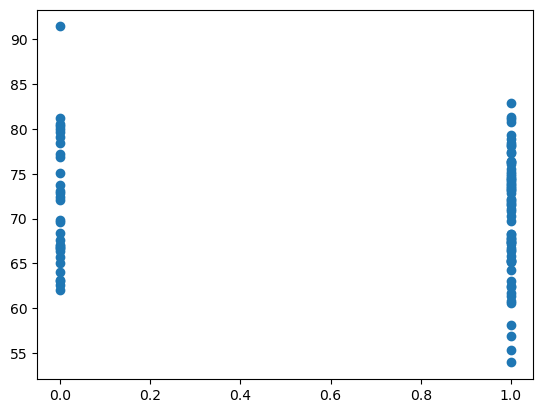

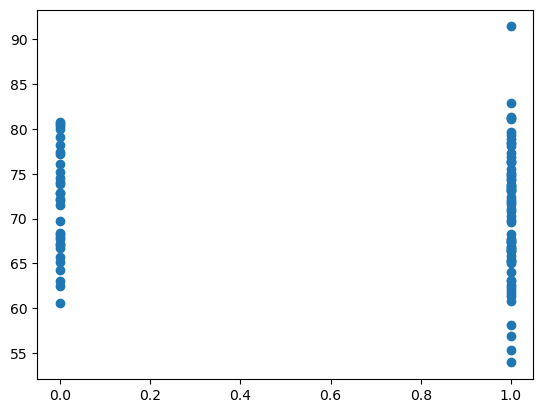

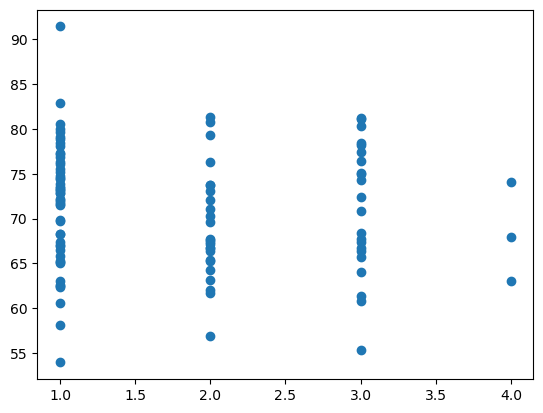

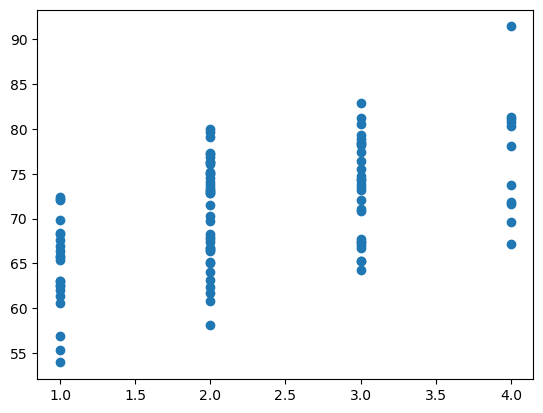

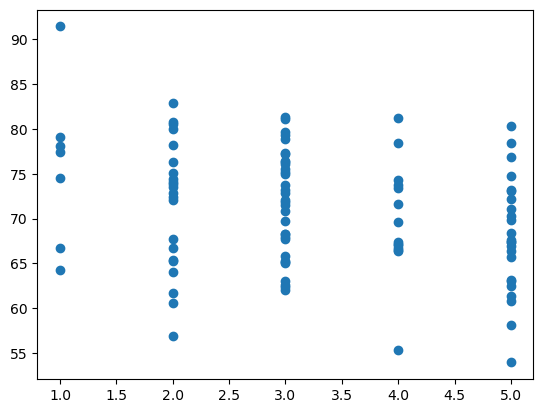

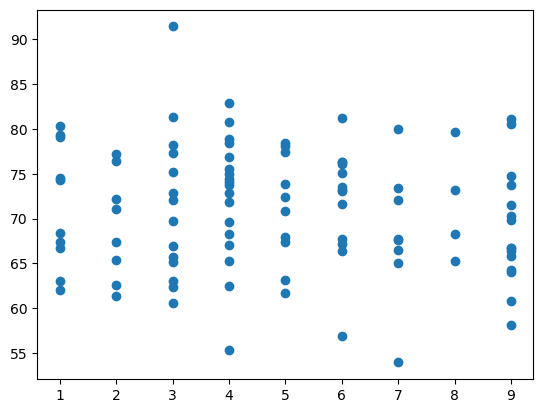

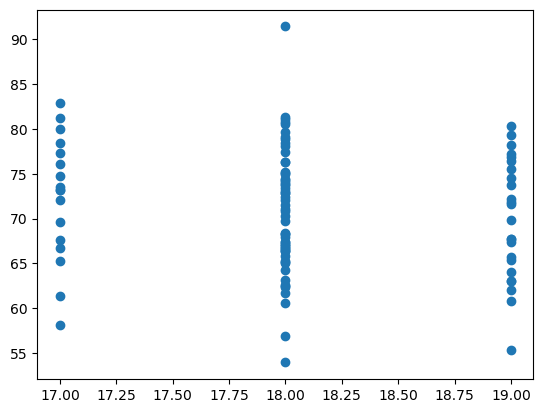

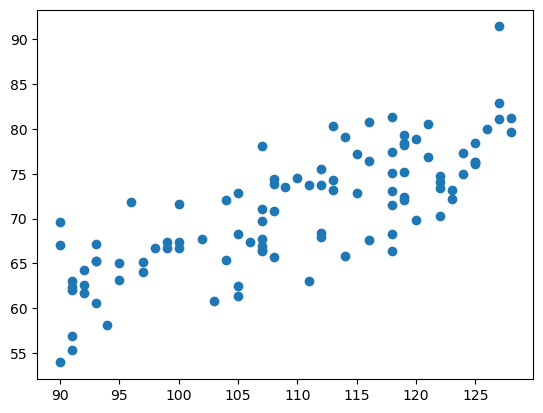

In [32]:
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:100, i:i+1].ravel(), y_train[:100])
    plt.show()

In [33]:
def z_score(x_train):
    x_mean = x_train.mean()
    x_std = x_train.std()
    x_train = (x_train - x_mean)/x_std
    return x_train, x_std, x_mean

In [34]:
def cost(x_train,y_train,w,b):
    y_hat = x_train@w + b
    return (1./2*len(y_train))*np.sum((y_train - y_hat)**2)

In [35]:
def gradient_descent(x_train,y_train,w,b):
    m = len(y_train)
    lr = 0.1
    
    y_hat = x_train@w + b
    dW = (1./m)*np.sum(x_train.T@(y_hat-y_train))
    dB = (1./m)*np.sum(y_hat-y_train)
    
    w -= lr*dW
    b -= lr*dB
    
    return w,b

In [36]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
    old_cost = cost(x_train,y_train,w,b)
    #print("cost = ", old_cost)
    w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

print(x_predict.shape, ans.shape)

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy*100.0/len(ans),2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

(200, 8) (200,)
Optimization required, your accuracy is 9.0%


### Looks like the data is very tough for linear regression to fit. Please let me know if I am doing something wrong. I have verified everything at my end.